<a href="https://colab.research.google.com/github/seltong/DataMiningProject-2020.2/blob/main/grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Criação de Modelo de Detecção de Anomalias para Termômetro IoT Usado em Refrigeradores Hospitalares**

---


Mineração de Dados 2020.2

Grupo 1: 
  Diego Mendes, 
  Ingrid Nunes, 
  Selton Guedes

# Importação da Base de Dados

In [ ]:
import numpy as np
from numpy import where
import pandas as pd
import io, warnings, pickle

import plotly.express as px
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Ao fazer usarDrive = True, será buscada a base de dados numa pasta compartilhada.
#Ao fazer usarDrive = False, será buscada a base localmente, basta ter o all_data.csv aqui.
usarDrive = True

dados = None
if usarDrive:
  drive.mount('/content/drive')
  caminhoDadosDrive = '/content/drive/Shareddrives/2020.2 - Mineração de Dados/Processamento/database/all_data.csv'
  dados = pd.read_csv(caminhoDadosDrive)
else:
  dados = pd.read_csv("all_data.csv")

#print(dados)

Mounted at /content/drive


# Pré-Processamento dos Dados

## Análise Descritiva

In [ ]:
print("Temp. min:", dados["value"].min())
print("Temp. média:", dados["value"].mean())
print("Temp. max:", dados["value"].max())

Temp. min: -21.4
Temp. média: -20.14698635477584
Temp. max: -8.3


### Gráfico BoxPlot

Text(0, 0.5, 'Temperatura')

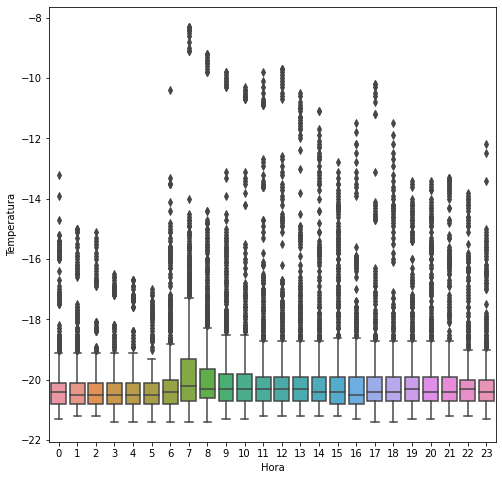

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='hour', y='value', data=dados)
plt.xlabel('Hora')
plt.ylabel('Temperatura')

### Gráfico Histograma

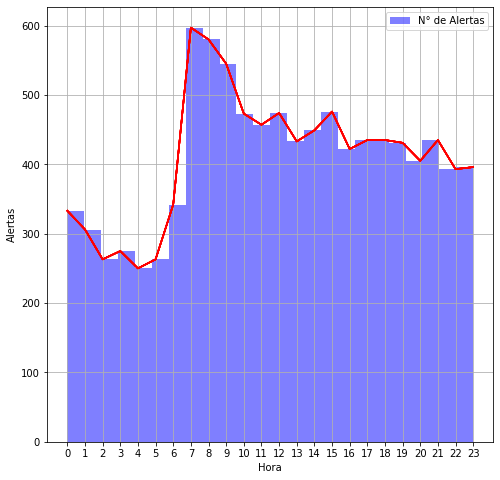

In [ ]:
df_alertas = dados[dados['is_alert'] == 1]

df_countHour = df_alertas.groupby("hour").count()
plt.subplots(figsize=(8, 8))

df_alertas['hour'].hist(alpha=0.5, color='blue', bins=24, label='N° de Alertas')
plt.legend()
plt.xlabel('Hora')
plt.ylabel('Alertas')
plt.xticks(range(0, 24))

plt.plot(df_countHour, color='red')

plt.show()

### Gráfico de Dispersão

Text(0, 0.5, 'Temperatura')

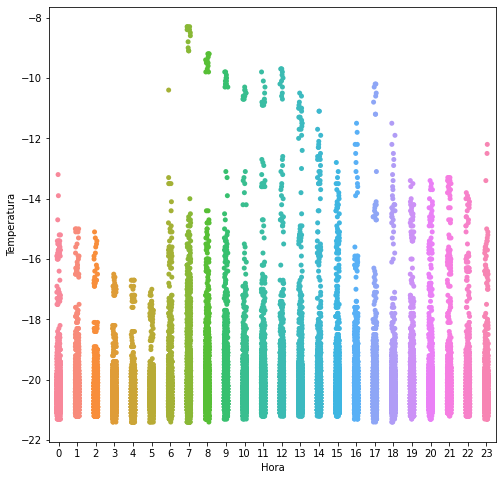

In [ ]:
plt.figure(figsize=(8, 8))
sns.stripplot (x='hour',y='value',data=dados)
plt.xlabel('Hora')
plt.ylabel('Temperatura')

### Gráfico de Violino

Text(0, 0.5, 'Temperatura')

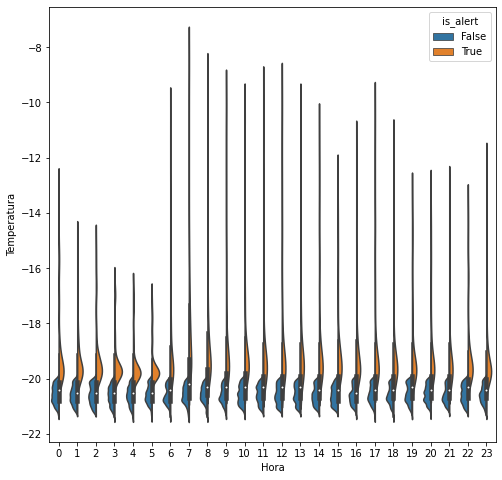

In [ ]:
plt.figure(figsize=(8, 8))
sns.violinplot(x='hour',y='value',data=dados, hue='is_alert', split=True)
plt.xlabel('Hora')
plt.ylabel('Temperatura')

# Processamento dos Dados

## Classificação

### Organização dos Dados

In [ ]:
# Remove the line identification and the monitored_object columns
# Get the variables columns
x_database = dados.iloc[:, 2:9]

# Format the variables array
x_database = x_database.values

#print(x_database)

In [ ]:
# Get the class column
y_database = dados.iloc[:, 9]

# Format the class array
y_database = y_database.values

#print(y_database)

#### Conversão dos valores categóricos em números (LabelEncoder)

In [ ]:
label_encoder_month = LabelEncoder()
label_encoder_weekday = LabelEncoder()

In [ ]:
x_database[:,1] = label_encoder_month.fit_transform(x_database[:,1])
x_database[:,3] = label_encoder_weekday.fit_transform(x_database[:,3])

In [ ]:
with open('nb-freezers_database.pkl', 'wb') as f:
  pickle.dump([x_database, y_database], f)

In [ ]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    x_database, y_database, test_size = 0.15, random_state = 0)

### Naïve Bayes

#### Treinamento

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_previsoes = naive_bayes.predict(x_teste)

#### Resultados

In [ ]:
accuracy_score(y_teste, nb_previsoes)

0.9379764379764379

In [ ]:
confusion_matrix(y_teste, nb_previsoes)

array([[4295,    0],
       [ 358, 1119]])

In [ ]:
print(classification_report(y_teste, nb_previsoes))

              precision    recall  f1-score   support

       False       0.92      1.00      0.96      4295
        True       1.00      0.76      0.86      1477

    accuracy                           0.94      5772
   macro avg       0.96      0.88      0.91      5772
weighted avg       0.94      0.94      0.93      5772



### Árvore de Decisão

#### Treinamento

In [ ]:
decision_tree = DecisionTreeClassifier(
    criterion = 'entropy',
    random_state = 0
)

decision_tree.fit(x_treinamento, y_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
decision_tree.feature_importances_

array([0., 0., 0., 0., 0., 0., 1.])

In [ ]:
tree_previsoes = decision_tree.predict(x_teste)

#### Resultados

In [ ]:
accuracy_score(y_teste, tree_previsoes)

1.0

In [ ]:
confusion_matrix(y_teste, tree_previsoes)

array([[4295,    0],
       [   0, 1477]])

In [ ]:
print(classification_report(y_teste, tree_previsoes))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4295
        True       1.00      1.00      1.00      1477

    accuracy                           1.00      5772
   macro avg       1.00      1.00      1.00      5772
weighted avg       1.00      1.00      1.00      5772



### KNN

#### Treinamento

In [ ]:
knn = KNeighborsClassifier(
    n_neighbors= 10,
    metric = 'minkowski',
    p = 2
)

knn.fit(x_treinamento, y_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
knn_previsoes = knn.predict(x_teste)

#### Resultados

In [ ]:
accuracy_score(y_teste, knn_previsoes)

0.8265765765765766

In [ ]:
confusion_matrix(y_teste, knn_previsoes)

array([[4189,  106],
       [ 895,  582]])

In [ ]:
print(classification_report(y_teste, knn_previsoes))

              precision    recall  f1-score   support

       False       0.82      0.98      0.89      4295
        True       0.85      0.39      0.54      1477

    accuracy                           0.83      5772
   macro avg       0.83      0.68      0.72      5772
weighted avg       0.83      0.83      0.80      5772



## Agrupamento

### Organização dos Dados

In [ ]:
# Remove the line identification and the monitored_object columns
# Get the variables columns
x_database = dados.iloc[:, [2, 3, 4, 6, 7, 8, 9]]

# Format the variables array
x_database = x_database.values

x_database

array([[12, 'janeiro', 2021, ..., 3, -20.2, False],
       [12, 'janeiro', 2021, ..., 8, -20.2, False],
       [12, 'janeiro', 2021, ..., 13, -20.3, False],
       ...,
       [31, 'maio', 2021, ..., 43, -19.7, True],
       [31, 'maio', 2021, ..., 48, -19.7, True],
       [31, 'maio', 2021, ..., 53, -19.7, True]], dtype=object)

#### Conversão dos valores categóricos em números (LabelEncoder)

In [ ]:
label_encoder_month = LabelEncoder()

In [ ]:
x_database[:,1] = label_encoder_month.fit_transform(x_database[:,1])
print(x_database)

[[12 2 2021 ... 3 -20.2 False]
 [12 2 2021 ... 8 -20.2 False]
 [12 2 2021 ... 13 -20.3 False]
 ...
 [31 3 2021 ... 43 -19.7 True]
 [31 3 2021 ... 48 -19.7 True]
 [31 3 2021 ... 53 -19.7 True]]


### K-means

#### Scaler

In [ ]:
x_temp = x_database[:, 0:6]
x_temp

array([[12, 2, 2021, 0, 3, -20.2],
       [12, 2, 2021, 0, 8, -20.2],
       [12, 2, 2021, 0, 13, -20.3],
       ...,
       [31, 3, 2021, 23, 43, -19.7],
       [31, 3, 2021, 23, 48, -19.7],
       [31, 3, 2021, 23, 53, -19.7]], dtype=object)

In [ ]:
scaler = StandardScaler()
x_temp = scaler.fit_transform(x_temp)

In [ ]:
x_database[:, 0:6] = x_temp

In [ ]:
x_database

array([[-0.5469846822162419, -0.03396452281521605, 0.0, ...,
        -1.5282147143656855, -0.04753055204295765, False],
       [-0.5469846822162419, -0.03396452281521605, 0.0, ...,
        -1.2395550860457705, -0.04753055204295765, False],
       [-0.5469846822162419, -0.03396452281521605, 0.0, ...,
        -0.9508954577258557, -0.13718775603633426, False],
       ...,
       [1.7106670842668978, 0.6509332839538835, 0.0, ...,
        0.7810623121936334, 0.4007554679239191, True],
       [1.7106670842668978, 0.6509332839538835, 0.0, ...,
        1.0697219405135483, 0.4007554679239191, True],
       [1.7106670842668978, 0.6509332839538835, 0.0, ...,
        1.3583815688334633, 0.4007554679239191, True]], dtype=object)

#### Clustering

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(x_database)
  wcss.append(kmeans.inertia_)

In [ ]:
grafico = px.line(x=range(1,11), y=wcss)
grafico.show()

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=0)
rotulos = kmeans.fit_predict(x_database)

#### PCA

In [ ]:
pca = PCA(n_components=2)
x_database = pca.fit_transform(x_database)

In [ ]:
x_database.shape

(38475, 2)

In [ ]:
grafico = px.scatter(x = x_database[:, 0], y = x_database[:, 1], color=rotulos)
grafico.show()

#### Base with labels

In [ ]:
listagem = np.column_stack((dados.iloc[:, 2:], rotulos))
listagem

array([[12, 'janeiro', 2021, ..., -20.2, False, 7],
       [12, 'janeiro', 2021, ..., -20.2, False, 7],
       [12, 'janeiro', 2021, ..., -20.3, False, 7],
       ...,
       [31, 'maio', 2021, ..., -19.7, True, 2],
       [31, 'maio', 2021, ..., -19.7, True, 2],
       [31, 'maio', 2021, ..., -19.7, True, 2]], dtype=object)

In [ ]:
listagem = listagem[listagem[:, 8].argsort()]
listagem

array([[22, 'março', 2021, ..., -20.6, False, 0],
       [26, 'março', 2021, ..., -20.5, False, 0],
       [26, 'março', 2021, ..., -20.4, False, 0],
       ...,
       [6, 'fevereiro', 2021, ..., -20.6, False, 7],
       [20, 'fevereiro', 2021, ..., -20.5, False, 7],
       [12, 'janeiro', 2021, ..., -20.2, False, 7]], dtype=object)

## Regressão

#### Temperatura Média por Hora

In [ ]:
x_database = dados.iloc[:, [6, 7, 8]]
df = pd.DataFrame(data=x_database)
groupHour = df.groupby(['hour']).count().rename(columns={'value': 'qtd_value'})['qtd_value']
sumTemp = df.groupby(['hour']).sum()['value']
merge = pd.merge(groupHour, sumTemp, on='hour', how='left')
merge['mean'] = merge.apply (lambda row: row.value / row.qtd_value, axis=1)
merge.head()

,qtd_value,value,mean
hour,,,
0,1588,-32161.2,-20.252645
1,1597,-32431.7,-20.307890
2,1596,-32484.5,-20.353697
3,1591,-32447.7,-20.394532
4,1594,-32551.0,-20.420954


In [ ]:
x_database = merge.drop(['qtd_value', 'value', 'mean'], axis=1)
x_database['hour'] = merge.index
# Get the class column
y_database = merge['mean']

# Format the class array
y_database = y_database.values

#x_database.head()

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    x_database, y_database, test_size = 0.3, random_state = 0)

In [ ]:
reg = LinearRegression().fit(x_treinamento, y_treinamento)
database_pred = reg.predict(x_teste)

reg.score(x_treinamento, y_treinamento)

0.09527647752405655

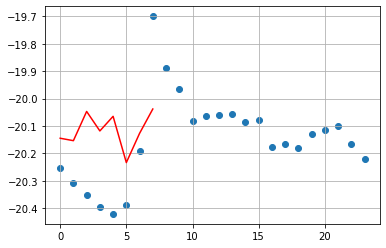

In [ ]:
plt.scatter(x_database, y_database)
plt.plot(database_pred, color='r')
#plt.ylim([-21, -19])
plt.grid()
plt.show()

#### Temperatura Média por Dia

In [ ]:
x_database = dados.iloc[:, [2, 6, 7, 8]]
df = pd.DataFrame(data=x_database)
groupHour = df.groupby(['day']).count().rename(columns={'value': 'qtd_value'})['qtd_value']
sumTemp = df.groupby(['day']).sum()['value']
merge = pd.merge(groupHour, sumTemp, on='day', how='left')
merge['mean'] = merge.apply (lambda row: row.value / row.qtd_value, axis=1)
merge.head()

,qtd_value,value,mean
day,,,
1,853,-17445.5,-20.451934
2,846,-17294.9,-20.443144
3,965,-19820.9,-20.539793
4,1141,-23371.0,-20.482910
5,1141,-23399.8,-20.508151


In [ ]:
x_database = merge.drop(['qtd_value', 'value', 'mean'], axis=1)
x_database['day'] = merge.index
# Get the class column
y_database = merge['mean']

# Format the class array
y_database = y_database.values

#x_database.head()
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    x_database, y_database, test_size = 0.3, random_state = 0)

In [ ]:
reg = LinearRegression().fit(x_treinamento, y_treinamento)
database_pred = reg.predict(x_teste)

reg.score(x_treinamento, y_treinamento)

0.2923262361940816

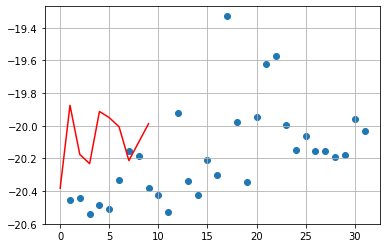

In [ ]:
plt.scatter(x_database, y_database)
plt.plot(database_pred, color='r')
#plt.ylim([-21, -19])
plt.grid()
plt.show()

# Detecção de Anomalias

### Organização dos Dados

In [ ]:
# Remove the line identification and the monitored_object columns
# Get the variables columns
x_database = dados.iloc[:, [2, 3, 4, 6, 7, 8]]

# Format the variables array
x_database = x_database.values

x_database

array([[12, 'janeiro', 2021, 0, 3, -20.2],
       [12, 'janeiro', 2021, 0, 8, -20.2],
       [12, 'janeiro', 2021, 0, 13, -20.3],
       ...,
       [31, 'maio', 2021, 23, 43, -19.7],
       [31, 'maio', 2021, 23, 48, -19.7],
       [31, 'maio', 2021, 23, 53, -19.7]], dtype=object)

In [ ]:
# Get the class column
y_database = dados.iloc[:, 9]

# Format the class array
y_database = y_database.values

#y_database

#### Conversão dos valores categóricos em números (LabelEncoder)

In [ ]:
label_encoder_month = LabelEncoder()

In [ ]:
x_database[:,1] = label_encoder_month.fit_transform(x_database[:,1])

In [ ]:
x_database

array([[12, 2, 2021, 0, 3, -20.2],
       [12, 2, 2021, 0, 8, -20.2],
       [12, 2, 2021, 0, 13, -20.3],
       ...,
       [31, 3, 2021, 23, 43, -19.7],
       [31, 3, 2021, 23, 48, -19.7],
       [31, 3, 2021, 23, 53, -19.7]], dtype=object)

### **Isolation Forest**

#### Dados para Treinamento

In [ ]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    x_database, y_database, test_size = 0.3, random_state = 0
)

#### Normalização

In [ ]:
scaler = MinMaxScaler()

In [ ]:
x_treinamento = scaler.fit_transform(x_treinamento)
x_treinamento

array([[0.73333333, 0.25      , 0.        , 0.17391304, 0.91525424,
        0.05343511],
       [0.6       , 1.        , 0.        , 0.30434783, 1.        ,
        0.02290076],
       [0.9       , 0.        , 0.        , 1.        , 0.94915254,
        0.10687023],
       ...,
       [0.06666667, 0.75      , 0.        , 0.86956522, 0.72881356,
        0.09160305],
       [1.        , 1.        , 0.        , 0.69565217, 0.55932203,
        0.03053435],
       [0.63333333, 0.5       , 0.        , 0.7826087 , 0.38983051,
        0.08396947]])

In [ ]:
x_teste = scaler.fit_transform(x_teste)
x_teste

array([[0.9       , 1.        , 0.        , 1.        , 0.42372881,
        0.08396947],
       [0.33333333, 1.        , 0.        , 0.        , 0.27118644,
        0.03816794],
       [0.7       , 0.        , 0.        , 0.39130435, 0.71186441,
        0.27480916],
       ...,
       [0.03333333, 0.25      , 0.        , 0.13043478, 0.94915254,
        0.06870229],
       [0.2       , 0.75      , 0.        , 0.04347826, 0.93220339,
        0.07633588],
       [0.6       , 0.75      , 0.        , 0.69565217, 0.6440678 ,
        0.09923664]])

#### Agrupamento

In [ ]:
clf = IsolationForest(n_estimators=20, random_state=0).fit(x_treinamento)
rotulos = clf.predict(x_teste)

In [ ]:
anomalies_detection = []

for r in rotulos:
  if r == -1:
    anomalies_detection.append(True)
  else:
    anomalies_detection.append(False)

#### Resultados

In [ ]:
accuracy_score(y_teste, anomalies_detection)

0.6797193104045742

In [ ]:
confusion_matrix(y_teste, anomalies_detection)

array([[6037, 2579],
       [1118, 1809]])

In [ ]:
print(classification_report(y_teste, anomalies_detection, zero_division=1))

              precision    recall  f1-score   support

       False       0.84      0.70      0.77      8616
        True       0.41      0.62      0.49      2927

    accuracy                           0.68     11543
   macro avg       0.63      0.66      0.63     11543
weighted avg       0.73      0.68      0.70     11543



### **K-means**

#### Dados para Treinamento

In [ ]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    x_database, y_database, test_size = 0.3, random_state = 0
)

#### Normalização

In [ ]:
scaler = MinMaxScaler()

In [ ]:
x_treinamento = scaler.fit_transform(x_treinamento)
x_treinamento

array([[0.73333333, 0.25      , 0.        , 0.17391304, 0.91525424,
        0.05343511],
       [0.6       , 1.        , 0.        , 0.30434783, 1.        ,
        0.02290076],
       [0.9       , 0.        , 0.        , 1.        , 0.94915254,
        0.10687023],
       ...,
       [0.06666667, 0.75      , 0.        , 0.86956522, 0.72881356,
        0.09160305],
       [1.        , 1.        , 0.        , 0.69565217, 0.55932203,
        0.03053435],
       [0.63333333, 0.5       , 0.        , 0.7826087 , 0.38983051,
        0.08396947]])

In [ ]:
x_teste = scaler.fit_transform(x_teste)
x_teste

array([[0.9       , 1.        , 0.        , 1.        , 0.42372881,
        0.08396947],
       [0.33333333, 1.        , 0.        , 0.        , 0.27118644,
        0.03816794],
       [0.7       , 0.        , 0.        , 0.39130435, 0.71186441,
        0.27480916],
       ...,
       [0.03333333, 0.25      , 0.        , 0.13043478, 0.94915254,
        0.06870229],
       [0.2       , 0.75      , 0.        , 0.04347826, 0.93220339,
        0.07633588],
       [0.6       , 0.75      , 0.        , 0.69565217, 0.6440678 ,
        0.09923664]])

#### Agrupamento

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(x_treinamento)
  wcss.append(kmeans.inertia_)

In [ ]:
grafico = px.line(x=range(1,11), y=wcss)
grafico.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
rotulos = kmeans.fit(x_treinamento)

In [ ]:
kmeans.cluster_centers_

array([[0.50377081, 0.17564479, 0.        , 0.21925081, 0.49491193,
        0.09230585],
       [0.54237005, 0.80680125, 0.        , 0.4954083 , 0.76527915,
        0.09444406],
       [0.46871778, 0.15725216, 0.        , 0.76680421, 0.50604933,
        0.09911983],
       [0.55758491, 0.80245812, 0.        , 0.52067038, 0.23672254,
        0.09658658]])

In [ ]:
distancias = pairwise_distances(x_teste, kmeans.cluster_centers_)
distancias

array([[1.20468457, 0.73253264, 0.97857793, 0.64896711],
       [0.89981407, 0.7574603 , 1.17278186, 0.60416034],
       [0.42347992, 0.84970453, 0.54078317, 0.96875164],
       ...,
       [0.664545  , 0.85838438, 0.89464715, 1.11385257],
       [0.80282966, 0.59403367, 1.06249051, 0.91784249],
       [0.76707088, 0.24771024, 0.62665521, 0.44844922]])

In [ ]:
limiar = 1

In [ ]:
anomalies_detection = []

for distancia in distancias:
  if distancia.min() < limiar:
    anomalies_detection.append(False)
  else:
    anomalies_detection.append(True)

#### Resultados

In [ ]:
accuracy_score(y_teste, anomalies_detection)

0.7464264056137919

In [ ]:
confusion_matrix(y_teste, anomalies_detection)

array([[8616,    0],
       [2927,    0]])

In [ ]:
print(classification_report(y_teste, anomalies_detection, zero_division=1))

              precision    recall  f1-score   support

       False       0.75      1.00      0.85      8616
        True       1.00      0.00      0.00      2927

    accuracy                           0.75     11543
   macro avg       0.87      0.50      0.43     11543
weighted avg       0.81      0.75      0.64     11543



### **DBSCAN**

#### Dados para Treinamento

In [ ]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    x_database, y_database, test_size = 0.3, random_state = 0
)

#### Normalização

In [ ]:
scaler = MinMaxScaler()

In [ ]:
x_dbscans = scaler.fit_transform(x_database)
x_dbscans

array([[0.36666667, 0.5       , 0.        , 0.        , 0.05084746,
        0.09160305],
       [0.36666667, 0.5       , 0.        , 0.        , 0.13559322,
        0.09160305],
       [0.36666667, 0.5       , 0.        , 0.        , 0.22033898,
        0.08396947],
       ...,
       [1.        , 0.75      , 0.        , 1.        , 0.72881356,
        0.12977099],
       [1.        , 0.75      , 0.        , 1.        , 0.81355932,
        0.12977099],
       [1.        , 0.75      , 0.        , 1.        , 0.89830508,
        0.12977099]])

In [ ]:
x_teste = scaler.fit_transform(x_teste)
x_teste

array([[0.9       , 1.        , 0.        , 1.        , 0.42372881,
        0.08396947],
       [0.33333333, 1.        , 0.        , 0.        , 0.27118644,
        0.03816794],
       [0.7       , 0.        , 0.        , 0.39130435, 0.71186441,
        0.27480916],
       ...,
       [0.03333333, 0.25      , 0.        , 0.13043478, 0.94915254,
        0.06870229],
       [0.2       , 0.75      , 0.        , 0.04347826, 0.93220339,
        0.07633588],
       [0.6       , 0.75      , 0.        , 0.69565217, 0.6440678 ,
        0.09923664]])

#### Agrupamento

In [ ]:
dbscans = DBSCAN(eps=2, min_samples=5)
rotulos = dbscans.fit_predict(x_database)
print(rotulos)

[0 0 0 ... 0 0 0]


In [ ]:
anomalies_detection = []

for r in rotulos:
  if r == -1:
    anomalies_detection.append(True)
  else:
    anomalies_detection.append(False)

#### Resultados

In [ ]:
accuracy_score(y_database, anomalies_detection)

0.7660818713450293

In [ ]:
confusion_matrix(y_database, anomalies_detection)

array([[28568,    39],
       [ 8961,   907]])

In [ ]:
print(classification_report(y_database, anomalies_detection, zero_division=1))

              precision    recall  f1-score   support

       False       0.76      1.00      0.86     28607
        True       0.96      0.09      0.17      9868

    accuracy                           0.77     38475
   macro avg       0.86      0.55      0.52     38475
weighted avg       0.81      0.77      0.69     38475



In [ ]:
listaAnomalias = []
i = 0
for r in rotulos:
  if r == -1:
    listaAnomalias.append(i)
  i += 1

anomalias = dados.loc[dados.index[listaAnomalias]]
print(anomalias)

       Unnamed: 0          monitored_object  day  ... minute  value is_alert
108          1877  Freezer de Plasma e Crio   12  ...      3  -16.7     True
109          1878  Freezer de Plasma e Crio   12  ...      8  -16.5     True
110          1879  Freezer de Plasma e Crio   12  ...     13  -16.6     True
111          1880  Freezer de Plasma e Crio   12  ...     18  -16.3     True
112          1881  Freezer de Plasma e Crio   12  ...     23  -15.7     True
...           ...                       ...  ...  ...    ...    ...      ...
38373       40142  Freezer de Plasma e Crio   31  ...     28  -15.4     True
38374       40143  Freezer de Plasma e Crio   31  ...     33  -15.8     True
38375       40144  Freezer de Plasma e Crio   31  ...     38  -16.3     True
38376       40145  Freezer de Plasma e Crio   31  ...     43  -16.6     True
38377       40146  Freezer de Plasma e Crio   31  ...     48  -16.9     True

[946 rows x 10 columns]


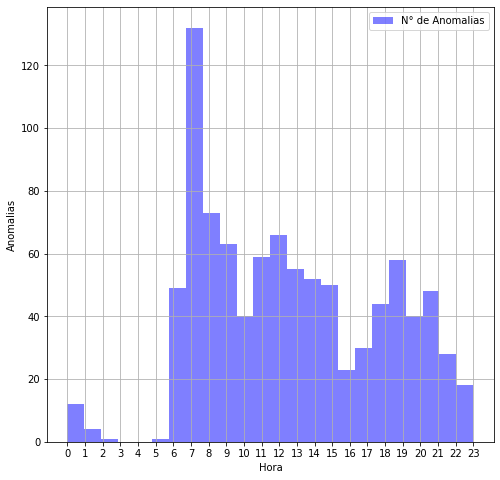

In [ ]:
plt.subplots(figsize=(8, 8))
anomalias['hour'].hist(alpha=0.5, color='blue', bins=24, label='N° de Anomalias')

plt.legend()
plt.xlabel('Hora')
plt.ylabel('Anomalias')
plt.xticks(range(0, 24))

plt.show()

Text(0, 0.5, 'Temperatura')

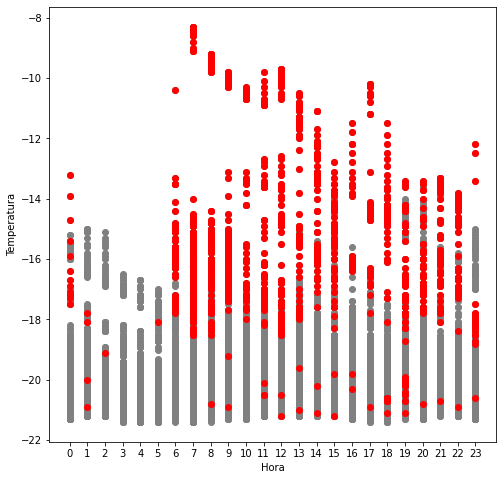

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(dados['hour'], dados['value'], color='grey')
plt.scatter(anomalias['hour'], anomalias['value'], color='red')
plt.xticks(range(0, 24))
plt.xlabel('Hora')
plt.ylabel('Temperatura')

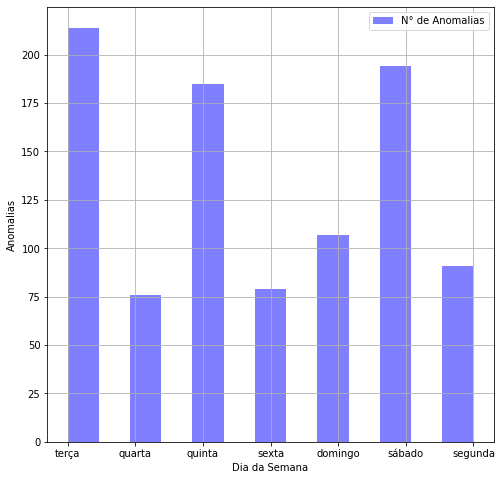

In [ ]:
plt.subplots(figsize=(8, 8))

anomalias['weekday'].hist(alpha=0.5, color='blue', bins=13, label='N° de Anomalias')

plt.legend()
plt.xlabel('Dia da Semana')
plt.ylabel('Anomalias')
plt.xticks(range(0, 7))

plt.show()